# ТЕМА 2.

Событийно-ориентированное программирование.

## Лекция.
Обработка событий средствами Qt

### Учебные вопросы

1. Классы событий
2. Перехват событий
3. Фильтр событий

## Источники

* Официальная документация: https://doc.qt.io/qtforpython/tutorials/basictutorial/signals_and_slots.html

* Прохоренок Н. А., Дронов В. А. Python 3 и PyQt 5. Разработка приложений. 2019 г.

### Основной цикл приложения.

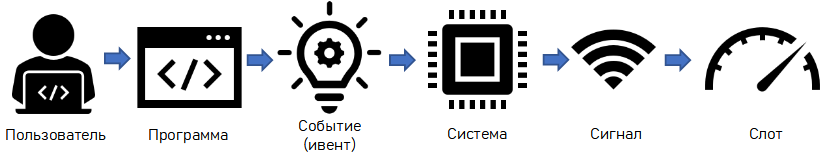

Каждое взаимодействие пользователя с приложением Qt является событием.

Существует много типов событий, каждое из которых представляет отдельный тип взаимодействия.

Когда происходит какое-либо событие, оно помещается в очередь событий и ждет обработки. Приложение поочередно извлекает события из очереди и отправляет их на обработку соответствующим объектам. Эти объекты могут быть виджетами, диалоговыми окнами или другими элементами пользовательского интерфейса.


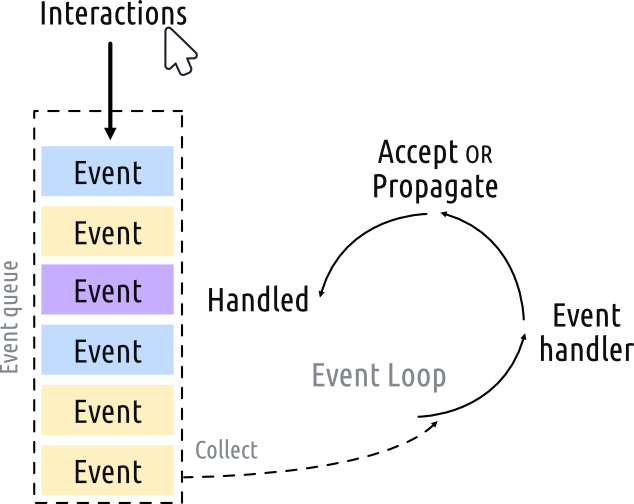


Обработка событий может включать в себя изменение состояния объекта, перемещение или изменение его визуального представления, а также вызов других методов или функций в зависимости от типа события. Например, если пользователь кликает на кнопку, приложение должно выполнить определенное действие, связанное с этой кнопкой.



Qt предоставляет механизм сигналов и слотов для удобной работы с событиями. Сигналы генерируются при возникновении определенного события, а слоты выполняют определенные действия в ответ на это событие. С помощью соединения сигналов и слотов можно управлять взаимодействием различных элементов приложения.



Event handling в Qt является одним из ключевых аспектов разработки приложений с графическим интерфейсом и позволяет реализовать удобное и отзывчивое взаимодействие с пользователем.


Qt представляет эти события с помощью классов событий, которые содержат информацию о том, что произошло. Эти события передаются определенным обработчикам событий в виджете, где произошло взаимодействие.

Определяя пользовательские или расширенные обработчики событий, вы можете изменить способ, которым ваши виджеты реагируют на эти события. Обработчики событий определяются так же, как и любой другой метод, но название зависит от типа события, которое они обрабатывают.

Следующая конструкция запускает основной цикл приложения и в процессе выполнения извлекает системные события собственного окна из очереди событий.

```python
app = QtWidgets.QApplication()
...
app.exec()
```

События как правило поступают автоматически при их вызове. Однако существуют методы для их отправки вручную (```postEvent()``` и ```sendEvent()```)

Получает события стандартный метод ```event()```. Для перехвата событий метод ```event()``` может быть переопределён.


### Перехват событий

Каждое взаимодействие с приложением порождает объект типа QtCore.QEvent или производного от него типа. Затем событие помещается в очередь событий (event queue). Событийный цикл на каждой итерации проверяет эту очередь и, если находится ожидающее событие, передаёт управление соответствующему обработчику (event handler).


Просмотр всех событий:

```python
def event(self, event: QtCore.QEvent) -> bool:
    print(event.type())
```

> Примечание:

Метод event() является более приоритетным при перехвате событий.

**Пример:**

В случае переопределения метода event() и closeEvent() в коде приложения, метод closeEvent() срабатывать не будет, а событие будет перехвачено методом event()


Например, щелчок мышью на виджет состоит из двух событий: зажатие кнопки мыши QEvent.MouseButtonPress и отпуск кнопки мыши QEvent.MouseButtonRelease. Оба из них генерируют объект события типа QMouseEvent. Чтобы их обработать особым образом, необходимо переопределить у виджета соответствующие обработчики.


Управление событиями:

* **accept()** – разрешает дальнейшую обработку события;
* **ignore()** – запрещает дальнейшую обработку события;
* **setAccepted(bool)** – разрешает дальнейшую обработку;
* **isAccepted()** – возвращает состояние события;
* **spontaneous()** – возвращает True, если событие сгенерировано системой, False, если внутри программы;
* **type()** – возвращает тип события;

### Классы событий

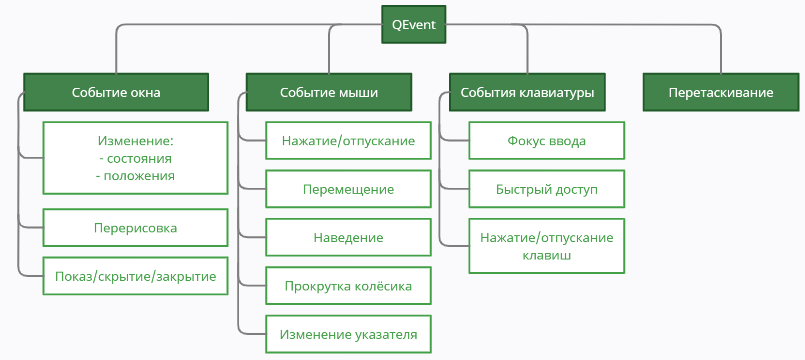

Примерный список классов QEvent:

|                               |                          |                                |
|-------------------------------|--------------------------|--------------------------------|
| * QActionEvent                | * QGestureEvent          | * QPlatformSurfaceEvent        |
| * QChildEvent                 | * QGraphicsSceneEvent    | * QResizeEvent                 |
| * QCloseEvent                 | * QHelpEvent             | * QScrollEvent                 |
| * QDragLeaveEvent             | * QHideEvent             | * QScrollPrepareEvent          |
| * QDropEvent                  | * QIconDragEvent         | * QShortcutEvent               |
| * QDynamicPropertyChangeEvent | * QInputEvent            | * QShowEvent                   |
| * QEnterEvent                 | * QInputMethodEvent      | * QStateMachine:: SignalEvent  |
| * QExposeEvent                | * QInputMethodQueryEvent | * QStateMachine:: WrappedEvent |
| * QFileOpenEvent              | * QMoveEvent             | * QStatusTipEvent              |
| * QFocusEvent                 | * QPaintEvent            | * QTimerEvent                  |
| * QWhatsThisClickedEvent      |                          |                                |

Одним из основных событий , которые получают виджеты , является QMouseEvent. События QMouseEvent создаются для каждого движения мыши и нажатия кнопки на виджете. Для обработки событий мыши доступны следующие обработчики событий:




|Обработчик события| Тип перехватываемого события|
|------------------|----------------|
|mouseMoveEvent	   | Мышь перемещена|
|mousePressEvent   | Нажата кнопка мыши|
|mouseReleaseEvent | Кнопка мыши отпущена|
|mouseDoubleClickEvent| Двойной щелчок мыши|


Например, нажатие на виджет вызовет событие ```QMouseEvent``` для отправки на метод ```mousePressEvent``` в этом виджете.

Этот обработчик может использовать объект event для получения информации о том, что произошло, например, что вызвало событие и где конкретно оно произошло.

Вы можете перехватывать события, подклассируя и переопределяя метод обработчика в классе.

Вы можете фильтровать, изменять или игнорировать события, передавая их обычному обработчику события, вызывая функцию родительского класса с помощью super().

```python
import sys

from PySide6 import QtWidgets, QtGui, QtCore


class Window(QtWidgets.QWidget):

    def __init__(self, parent=None):
        super().__init__(parent)

        self.initUi()

    def initUi(self) -> None:
        """
        Доинициализация Ui

        :return: None
        """

        self.setFixedSize(300, 100)
        # self.setMouseTracking(True)

        self.label = QtWidgets.QLabel("Нажми на меня")
        self.label.setAlignment(QtCore.Qt.AlignmentFlag.AlignCenter)

        layout = QtWidgets.QVBoxLayout()
        layout.addWidget(self.label)
        self.setLayout(layout)

    def mouseMoveEvent(self, event: QtGui.QMouseEvent) -> None:
        """
        Обработка событий движения мыши

        :param event: QtGui.QMouseEvent
        :return: None
        """

        self.label.setText("mouseMoveEvent")

    def mousePressEvent(self, event: QtGui.QMouseEvent) -> None:
        """
        Обработка событий нажатия мыши

        :param event: QtGui.QMouseEvent
        :return: None
        """

        self.label.setText("mousePressEvent")

    def mouseReleaseEvent(self, event: QtGui.QMouseEvent) -> None:
        """
        Обработка событий отпускания мыши

        :param event: QtGui.QMouseEvent
        :return: None
        """

        self.label.setText("mouseReleaseEvent")

    def mouseDoubleClickEvent(self, event: QtGui.QMouseEvent) -> None:
        """
        Обработка событий двойного нажатия мыши

        :param event: QtGui.QMouseEvent
        :return: None
        """

        self.label.setText("mouseDoubleClickEvent")


if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)

    window = Window()
    window.show()

    app.exec()


```

**Обратите внимание**, что события перемещения мыши регистрируются только при нажатой кнопке.

Вы можете изменить это, установив параметр ```self.setMouseTracking(True)```.

Вы также можете заметить, что события нажатия (щелчка) и двойного щелчка срабатывают при нажатии кнопки. При отпускании кнопки срабатывает только событие ```release```. Обычно для регистрации щелчка пользователя вы должны следить как за нажатием мыши, так и за отпусканием.

Внутри обработчиков событий у вас есть доступ к объекту события. Этот объект содержит информацию о событии и может использоваться для реагирования по-разному в зависимости от того, что именно произошло.

#### События мыши

Все события мыши в Qt отслеживаются с помощью объекта ```QMouseEvent```, при этом информация о событии считывается из следующих методов событий.

|Способ      |Return|
|---         |---|
|.button()   | Конкретная кнопка, которая вызвала это событие|
|.buttons()  |Состояние всех кнопок мыши (или флагов)
|.globalPos()|Приложение -глобальная позиция как QPoint
|.globalX()  |Приложение - глобальная горизонтальная позиция X
|.globalY()  |Приложение - глобальное вертикальное положение Y
|.pos()      |Виджет - относительное положение в виде целого QPoint числа
|.posF()     |Виджет - относительное положение с QPointF плавающей точкой



Вы можете использовать эти методы в обработчике событий, чтобы по-разному реагировать на разные события или полностью игнорировать их.

Позиционные методы предоставляют как глобальную, так и локальную (относящуюся к виджету) информацию о местоположении в виде объектов ```QPoint```, в то время как кнопки отображаются с использованием типов кнопок мыши из ```Qt``` пространства имен.

Следующий код позволит по-разному реагировать на щелчок левой, правой или средней кнопкой мыши по окну.

```python
from time import ctime

from PySide6 import QtWidgets, QtGui, QtCore


class Window(QtWidgets.QWidget):

    def __init__(self, parent=None):
        super().__init__(parent)

        self.initUi()

    def initUi(self) -> None:
        """
        Доинициализация Ui

        :return: None
        """

        self.setFixedSize(300, 100)
        # self.setMouseTracking(True)

        self.label = QtWidgets.QLabel("Нажми на меня")
        self.label.setAlignment(QtCore.Qt.AlignmentFlag.AlignCenter)

        layout = QtWidgets.QVBoxLayout()
        layout.addWidget(self.label)
        self.setLayout(layout)

    def mousePressEvent(self, event: QtGui.QMouseEvent) -> None:
        """
        Обработка событий нажатия мыши

        :param event: QtGui.QMouseEvent
        :return: None
        """

        if event.button() == QtCore.Qt.LeftButton:
            print(ctime(), "mousePressEvent LEFT")
            self.label.setText("mousePressEvent LEFT")

        elif event.button() == QtCore.Qt.MiddleButton:
            print(ctime(), "mousePressEvent MIDDLE")
            self.label.setText("mousePressEvent MIDDLE")

        elif event.button() == QtCore.Qt.RightButton:
            print(ctime(), "mousePressEvent RIGHT")
            self.label.setText("mousePressEvent RIGHT")

    def mouseReleaseEvent(self, event: QtGui.QMouseEvent) -> None:
        """
        Обработка событий отпускания мыши

        :param event: QtGui.QMouseEvent
        :return: None
        """

        if event.button() == QtCore.Qt.LeftButton:
            print(ctime(), "mouseReleaseEvent LEFT")
            self.label.setText("mouseReleaseEvent LEFT")

        elif event.button() == QtCore.Qt.MiddleButton:
            print(ctime(), "mouseReleaseEvent MIDDLE")
            self.label.setText("mouseReleaseEvent MIDDLE")

        elif event.button() == QtCore.Qt.RightButton:
            print(ctime(), "mouseReleaseEvent RIGHT")
            self.label.setText("mouseReleaseEvent RIGHT")

    def mouseDoubleClickEvent(self, event: QtGui.QMouseEvent) -> None:
        """
        Обработка событий двойного нажатия мыши

        :param event: QtGui.QMouseEvent
        :return: None
        """

        if event.button() == QtCore.Qt.LeftButton:
            print(ctime(), "mouseDoubleClickEvent LEFT")
            self.label.setText("mouseDoubleClickEvent LEFT")

        elif event.button() == QtCore.Qt.MiddleButton:
            print(ctime(), "mouseDoubleClickEvent MIDDLE")
            self.label.setText("mouseDoubleClickEvent MIDDLE")

        elif event.button() == QtCore.Qt.RightButton:
            print(ctime(), "mouseDoubleClickEvent RIGHT")
            self.label.setText("mouseDoubleClickEvent RIGHT")


if __name__ == '__main__':
    app = QtWidgets.QApplication()

    window = Window()
    window.show()

    app.exec()
```

Идентификаторы кнопок определяются в пространстве имен ```Qt``` следующим образом:


|Идентификатор | Значение (двоичное) | Представляет |
| ---          | ---                 | ---          |
|Qt.NoButton   | 0 (000)             | Кнопка не нажата, или событие не связано с нажатием кнопки. |
|Qt.LeftButton|	1 (001)|	Нажата левая кнопка
|Qt.RightButton|	2 (010)|	Нажата правая кнопка.
|Qt.MiddleButton|	4 (100)|	Нажата средняя кнопка.

### Фильтр событий

В Qt реализована возможность для отслеживания событий одного экземпляра QObject, предназначенные для другого экземпляра QObject до того как последний получит их.

Так же Qt определять нестандартное поведение для конкретного экземпляра QObject путем отбора необходимых событий и экземпляров.

```python
import sys

from PySide6 import QtWidgets, QtGui, QtCore


class Window(QtWidgets.QWidget):

    def __init__(self, parent=None):
        super().__init__(parent)

        self.initUi()

    def initUi(self) -> None:
        """
        Доинициализация Ui

        :return: None
        """

        self.setFixedSize(300, 100)
        # self.setMouseTracking(True)

        self.label = QtWidgets.QLabel("Нажми на меня")
        self.label.setAlignment(QtCore.Qt.AlignmentFlag.AlignCenter)
        self.label.installEventFilter(self)  # Установка фильтра событий на конкретный виджет

        layout = QtWidgets.QVBoxLayout()
        layout.addWidget(self.label)
        self.setLayout(layout)

    def eventFilter(self, watched: QtCore.QObject, event: QtCore.QEvent) -> bool:
        """
        Настройка дополнительного поведения виджетов

        :param watched: QtCore.QObject
        :param event: QtCore.QEvent
        :return: bool
        """

        if watched == self.label and event.type() == QtCore.QEvent.Type.MouseButtonPress:
            print("mouse pressed")

        if watched == self.label and event.type() == QtCore.QEvent.Type.Wheel:
            print("wheel changed")
            print(event.angleDelta())

        return super(Window, self).eventFilter(watched, event)


if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)

    window = Window()
    window.show()

    app.exec()

```